In [42]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE, MDS, Isomap
from time import time
import numpy as np
import pandas as pd
plt.style.use("dark_background")

In [18]:
digits = load_digits()

In [20]:
digits_pd_data = pd.DataFrame(data=np.c_[digits["data"]])
digits_pd_data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


La data del dataset `load_digits` viene en 1797 arrays de 64 elementos. Cada elemento es un número de 0 a 16 representando un nivel de luz, de más claro a más oscuro.

In [4]:
digits["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

En el mismo dataset viene integrado una conversión a una matriz $8 \times 8$ para su visualización en una imagen de tamaño $8 \times 8$ pixeles.

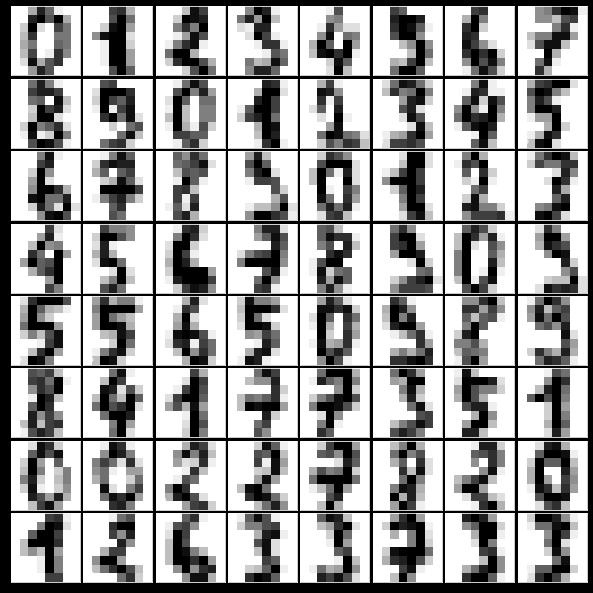

In [5]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

La base de datos viene dada por 1797 matrices de 8x8 (digits.images), donde cada elemento ij de la matriz representa un nivel de brillo. Así, en este caso en particular el nivel mínimo es representado por un 0, en tanto el nivel máximo es representado por un 16. Más aún, el color de la imagen viene dado por `imshow` y su parámetro `cmap=`.

# Reducción de Dimensionalidad

Para poder ver gráficamente nuestros datos necesitamos reducirles la dimensión, esto pues tienen 64 dimensiones. El método de PCA (Principal Component Analysis) reduce la dimensión de los datos para no perder información de dimensiones superiores.

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


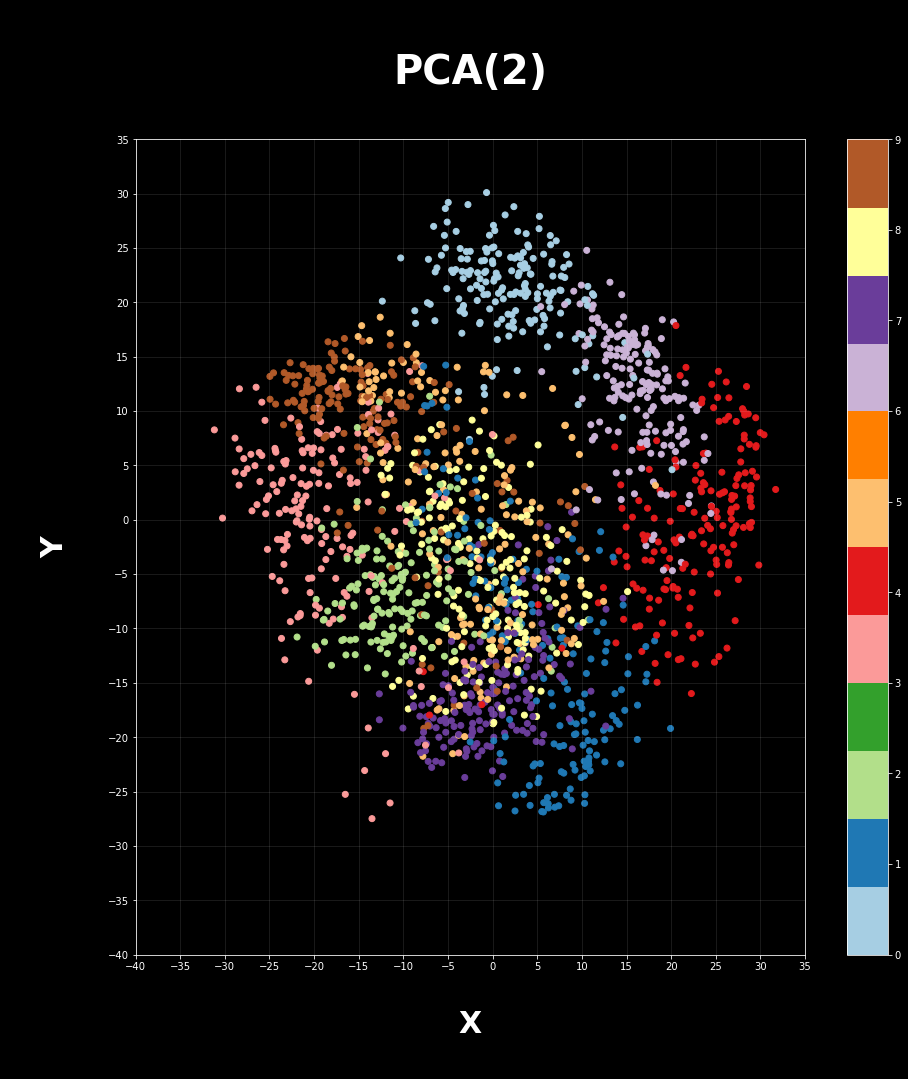

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [46]:
print(digits.data)
plt.figure(figsize=(15, 15))
pca2 = PCA(n_components=2)
proj2 = pca2.fit_transform(digits.data)
plt.scatter(proj2[:, 0], proj2[:, 1], c=digits.target, cmap="Paired")
# Insertar colorbar ---------------------------------------------------------------------------------------------------
plt.colorbar()
plt.xticks(np.arange(-40, 40, step=5))
plt.yticks(np.arange(-40, 40, step=5))
plt.xlabel("\nX\n", fontweight="bold", fontsize=30)
plt.ylabel("\nY\n", fontweight="bold", fontsize=30)
plt.title("\nPCA(2)\n", fontweight="extra bold", fontsize=40)
plt.grid(True, linewidth=1, alpha=0.1)
plt.show()
print(digits.data)

Utilizando `PCA(n_components=2)` reducimos nuestros datos a 2D. Estas proyecciones de dimensiones superiores las podemos graficar en 2D, obteniendo el resultado anterior.

El en gráfico podemos ver distintos grupos de colores, donde aquellos grupos más homogéneos nos dan a entender que son números más distintos a los demás, como el 0 y el 1. Sin embargo, se pueden ver varios grupos superpuestos, como el 5 y el 8.

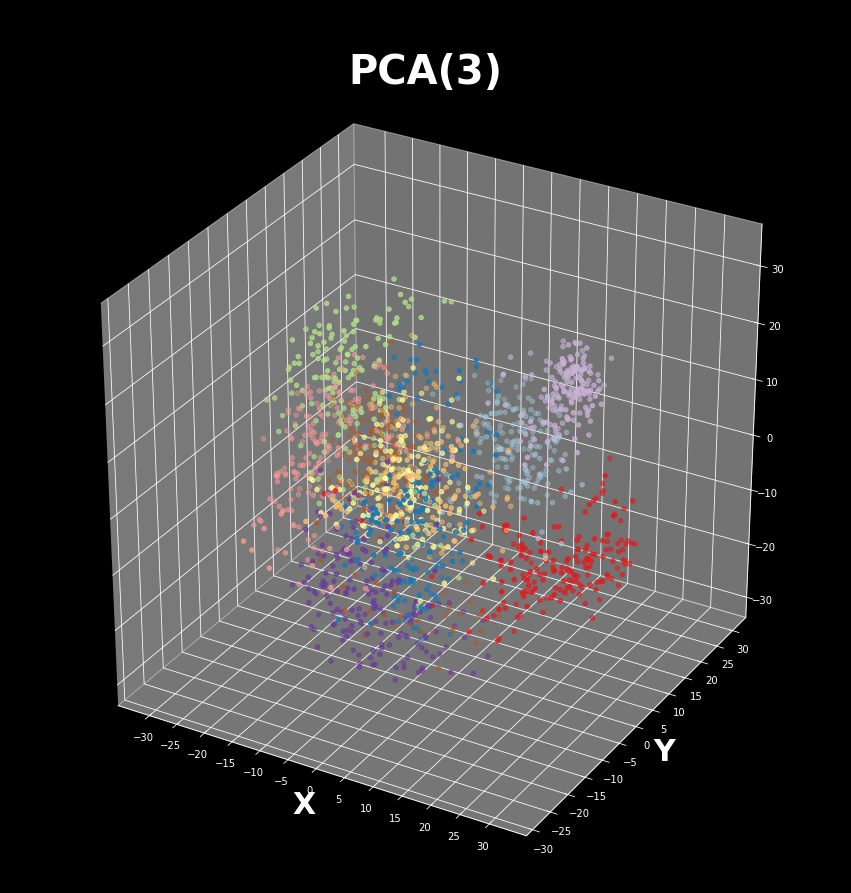

In [7]:
plt.figure(figsize=(15, 15))
pca3 = PCA(n_components=3)
proj3 = pca3.fit_transform(digits.data)
ax = plt.axes(projection='3d')
ax.scatter3D(proj3[:, 0], proj3[:, 1], proj3[:,2], c=digits.target, cmap="Paired")
plt.xticks(np.arange(-40, 40, step=5))
plt.yticks(np.arange(-40, 40, step=5))
plt.xlabel("\nX\n", fontweight="bold", fontsize=30)
plt.ylabel("\nY\n", fontweight="bold", fontsize=30)
plt.title("\nPCA(3)\n", fontweight="extra bold", fontsize=40)
plt.grid(True, linewidth=1, alpha=0.1)
plt.show()
################################################### Agregar 3D movmineto #####################################

Utilizando `PCA(n_components=3)` reducimos nuestros datos a 3D. Estas proyecciones de dimensiones superiores también las podemos graficar, obteniendo el resultado anterior.

<h1>REVISAR altair<h1/>

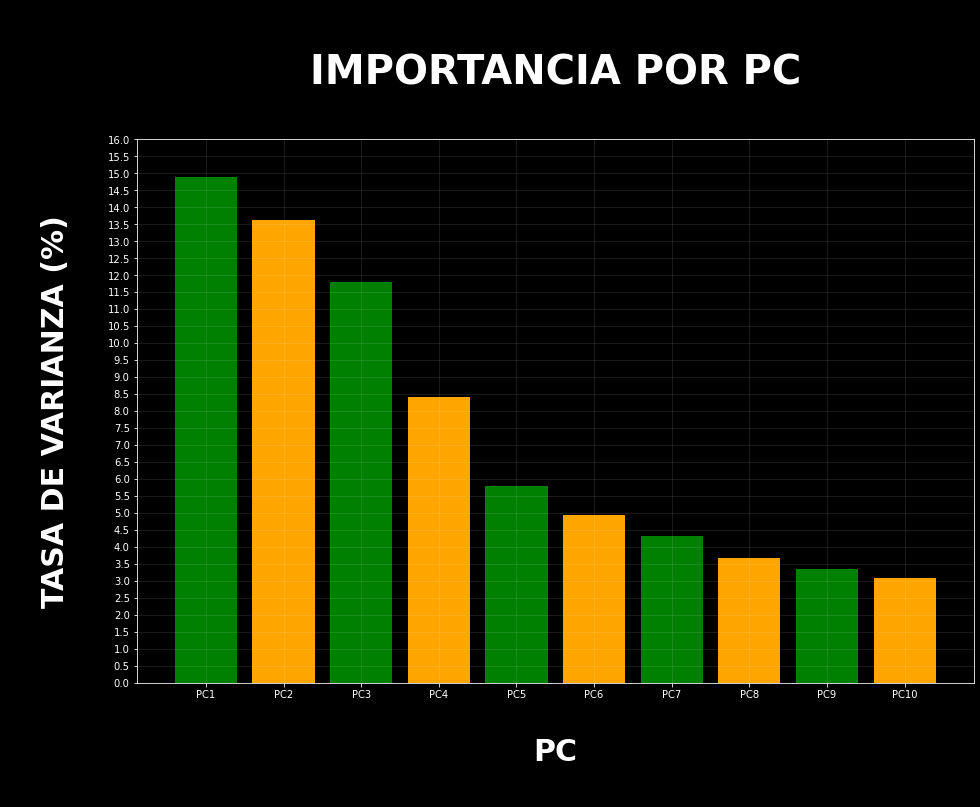

In [8]:
pca_stat = PCA(n_components=10)
proj_stat = pca_stat.fit_transform(digits.data)
per_var = np.round(pca_stat.explained_variance_ratio_* 100, decimals=2)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(15, 10))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels, color=["green", "orange", "green", "orange", \
                                                                                "green", "orange", "green", "orange", \
                                                                                "green", "orange"])
plt.yticks(np.arange(0, 16.5, step=0.5))
plt.xlabel("\nPC\n", fontweight="bold", fontsize=30)
plt.ylabel("\nTASA DE VARIANZA (%)\n", fontweight="bold", fontsize=30)
plt.title("\nIMPORTANCIA POR PC\n", fontweight="extra bold", fontsize=40)
plt.grid(True, linewidth=1, alpha=0.1)
plt.show()

diovbsdbouibsbdofs

<h1>Otros métodos<h1/>

In [43]:
pca_inicio = time()
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
pca_fin = time()
tsne_inicio = time()
tsne = TSNE(n_components = 2)
intermediates_tsne = tsne.fit_transform(digits.data)
tsne_fin = time()
mds_inicio = time()
mds = MDS(n_components = 2)
intermediates_mds = mds.fit_transform(digits.data)
mds_fin = time()
isomap_inicio = time()
isomap_ = Isomap(n_components=2)
proj_isomap = isomap_.fit_transform(digits.data)
isomap_fin = time()
tsvd_inicio = time()
tsvd = TruncatedSVD(n_components=2)
proj_tsvd = tsvd.fit_transform(digits.data)
tsvd_fin = time()

In [61]:
d = {"PCA": [round(pca_fin - pca_inicio, 3)], "t-SNE": [round(tsne_fin - tsne_inicio, 3)], "MDS": [round(mds_fin - mds_inicio, 3)], \
     "Isomap": [round(isomap_fin - isomap_inicio, 3)], "T-SVD": [round(tsvd_fin - tsvd_inicio, 3)]}
tiempos = pd.DataFrame(data=d, index=["Tiempo en segundos"])
tiempos

,PCA,t-SNE,MDS,Isomap,T-SVD
Tiempo en segundos,0.022,15.568,231.427,2.897,0.013


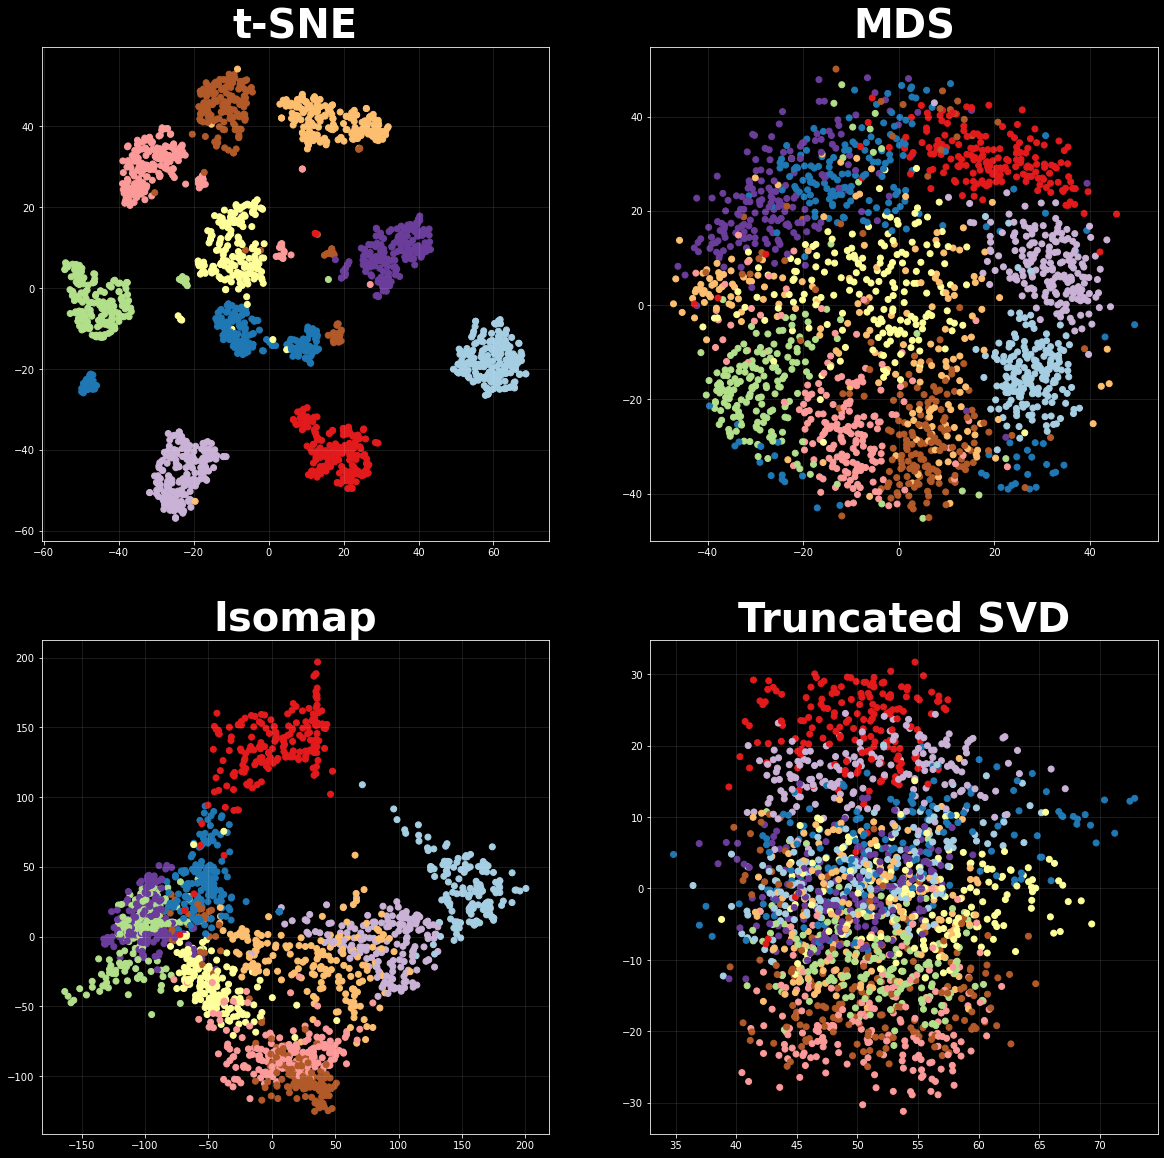

In [72]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.scatter(intermediates_tsne[:, 0], intermediates_tsne[:, 1], c=digits.target, cmap="Paired")
plt.title("t-SNE", fontweight="extra bold", fontsize=40)
plt.grid(True, linewidth=1, alpha=0.1)
plt.subplot(2, 2, 2)
plt.scatter(intermediates_mds[:, 0], intermediates_mds[:, 1], c=digits.target, cmap="Paired")
plt.title("MDS", fontweight="extra bold", fontsize=40)
plt.grid(True, linewidth=1, alpha=0.1)
plt.subplot(2, 2, 3)
plt.scatter(proj_isomap[:, 0], proj_isomap[:, 1], c=digits.target, cmap="Paired")
plt.title("Isomap", fontweight="extra bold", fontsize=40)
plt.grid(True, linewidth=1, alpha=0.1)
plt.subplot(2, 2, 4)
plt.scatter(proj_tsvd[:, 0], proj_tsvd[:, 1], c=digits.target, cmap="Paired")
plt.title("Truncated SVD", fontweight="extra bold", fontsize=40)
plt.grid(True, linewidth=1, alpha=0.1)
plt.show()